In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
#import imutils
import copy

CAMERA=0
PORTS=3
CAL_PARAM = {'thresh': [65,100],
            'radius': [4, 9]}

def capture_pic(camera = CAMERA, rotation = 0):
    '''Capture a picture from camera.
    
    Args:
        name (str):     The name of picture
        camera (int):   Camera number (Use check_camera() to find correct camera
        rotation(int):  Number of anti-clockwise rotations for image
    
    Returns:
        bool: True if successful, False otherwise
    '''
    try:
        cap = cv2.VideoCapture(camera)
        # Capture frame-by-frame
        ret, frame = cap.read()
    
        frame = np.rot90(frame, rotation)
    # Display the resulting frame
        #cv2.imwrite(name,frame)
        #plt.imshow(frame)
        return frame
    except:
        return False

def check_camera(ports = PORTS):
    
    '''Checks all attached ports for connected camera
    
    Args:
        ports (int): Number of ports to test
    
    Returns:
        Displays matplotlib figure with connected cameras and corresponding port numbers
    '''
    frame = {}
    for i in range(ports):
        vc = cv2.VideoCapture(i)
        if vc.isOpened():
            rval, capture = vc.read()
            frame[i] = capture
        else:
            print ('Webcam ' + str(i) + ' is not connected')
        vc.release()
    dim1 = int(np.ceil(np.sqrt(len(frame))))
    dim2 = int(np.ceil(float(len(frame))/dim1))
    dim = (str(dim1) + str(dim2))
    print (len(frame), dim)
    if len(frame)>0:
        plt.figure()
        num = 1
        for (key) in frame:
            #print key, np.shape(frame[key])
            plt.subplot(int(str(dim)+str(num))), plt.imshow(frame[key])
            plt.title(str(key)), plt.xticks([]), plt.yticks([])
            num = num + 1
    else:
        print ("No webcams detected at all")
    plt.show()

Webcam 2 is not connected
(2, '21')


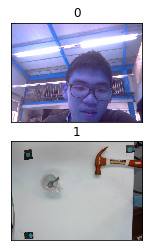

In [2]:
check_camera()

In [3]:
frame = {}
for i in range(3):
    vc = cv2.VideoCapture(i)
    if vc.isOpened():
        rval, capture = vc.read()
        frame[i]=capture
    else:
        print "No webcam at "+str(i)
    vc.release()

No webcam at 2


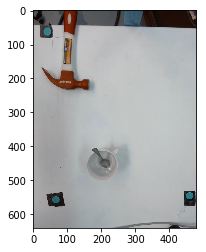

True

In [4]:
cali_img = capture_pic(1, 1)
plt.imshow(cali_img)
plt.show()
cv2.imwrite("cali_img.jpg",cali_img)

{'radius': [10, 14], 'thresh': [125, 180]}
31
All Calibration points found
Quit


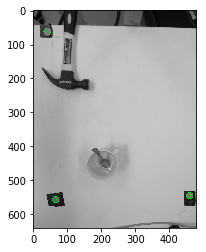

In [5]:
import vision_tools as vt

cali_img = cv2.imread("cali_img.jpg")
CAL_PARAM = {'thresh': [125, 180],
            'radius': [10,14]}
circles, cimg = vt.find_circles(copy.copy(cali_img), 2, param=CAL_PARAM, blur=1, show=True)
plt.imshow(cimg)
plt.show()
circles_sorted, crop_points = vt.sort_circles3(circles)

In [7]:
import vision_copy as vc
cali_circles_init = circles-circles[0][0]
cali_circles=[]
for circ in cali_circles_init[0]:
    cali_circles.append([circ[0], circ[1]])

print cali_circles

p1, inverse = vc.pix3world_cal(cali_circles[0],cali_circles[2], cali_circles[1])

[[0.0, 0.0], [417.0, 481.0], [25.0, 493.0]]


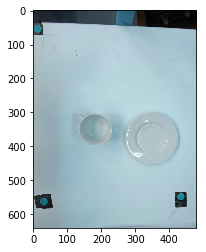

True

In [93]:
test_img = capture_pic(1,1)
plt.imshow(test_img)
plt.show()
cv2.imwrite("test_img4.jpg", test_img)

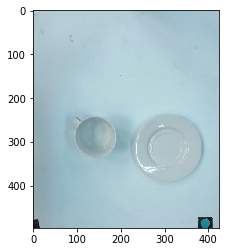

In [94]:


img = vt.crop_out(test_img, crop_points)
plt.imshow(img)
plt.show()

{'radius': [30, 85], 'thresh': [25, 60]}
22
All Calibration points found


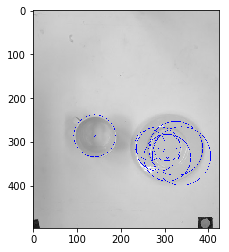

{'radius': [30, 85], 'thresh': [105, 140]}
52
All Calibration points found


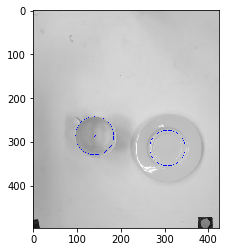

In [95]:
CAL_PARAM = {'thresh': [25, 60],
            'radius': [30,85]}
img = vt.crop_out(copy.copy(test_img), crop_points)
circles, cimg = vt.find_circles(copy.copy(img), 6, param=CAL_PARAM, blur=1, show=False)
plt.imshow(cimg)
plt.show()

CAL_PARAM = {'thresh': [105, 140],
            'radius': [30,85]}
img = vt.crop_out(copy.copy(test_img), crop_points)
circles2, cimg = vt.find_circles(copy.copy(img), 1, param=CAL_PARAM, blur=1, show=False)
plt.imshow(cimg)
plt.show()

In [96]:
edged, edg_img, cnts, hierarchy=vt.extract_contours(copy.copy(img), min_thresh=25, max_thresh=40, blur = 5, dilate=1, erode=0, cnt_mode = cv2.RETR_TREE)

7
2
{'cup': {'num_circles': 1, 'circle': array([ 140.5       ,  286.5       ,   44.79397202], dtype=float32), 'id': 1}, 'saucer': {'num_circles': 6, 'circle': array([ 306.5       ,  314.5       ,   41.30980682], dtype=float32), 'id': 0}}


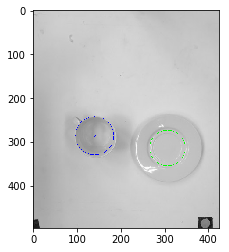

In [106]:
from scipy.spatial.distance import cdist

print len(circles[0])
print len(circles2[0])

table_circles = {}
store = []
for j,i in enumerate(circles2[0]):
    circle_info = {}
    circle_info["id"] = j
    coords = np.array([i[:-1]])
    radius = i[-1]
    circle_info["circle"]=i
    num = 0
    for k in (circles[0]):
        #print np.array([k[:-1]])
        if cdist(np.array([k[:-1]]),coords)<radius:
            num = num+1
    circle_info["num_circles"]=num
    store.append(circle_info)
for member in store:
    if member["num_circles"]>3:
        color = (0,255,0)
        table_circles["saucer"]=member
    else:
        color = (0,0,255)
        table_circles["cup"]=member
    
    cv2.circle(cimg,(int(member["circle"][0]),int(member["circle"][1])),int(member["circle"][2]),color,1)
                # draw the center of the ci~rcle
    cv2.circle(cimg,(int(member["circle"][0]),int(member["circle"][1])),2,color,1)

print table_circles
plt.imshow(cimg)
plt.show()

In [58]:
import os
cv2.imwrite(os.path.join("task_images", 'test.jpg'), test_img)

True

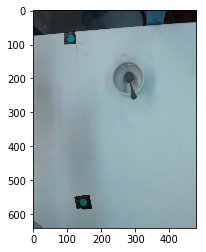

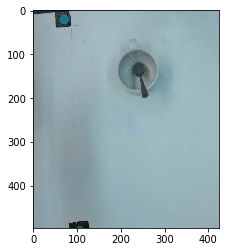

In [198]:
test_img = capture_pic(1,1)
plt.imshow(test_img)
plt.show()
cv2.imwrite("test_img5.jpg", test_img)#

img = vt.crop_out(test_img, crop_points)
plt.imshow(img)
plt.show()

In [199]:
test_img = copy.copy(img)

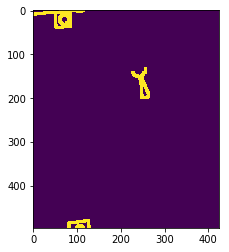

In [223]:
plt.imshow(edged)
plt.show()

{'radius': [30, 45], 'thresh': [75, 100]}
37
All Calibration points found
(59, 1, 2)
(59, 2)
DISTANCE:  361.608213402
MINDISTANCE:  1000
BOX:  [[ 77 495]
 [ 77 477]
 [131 477]
 [131 495]]
BOX TOO SMALL:  972
(87, 1, 2)
(87, 2)
DISTANCE:  16.3248277173
MINDISTANCE:  361.608213402
BOX:  [[231 206]
 [222 133]
 [258 129]
 [267 202]]
(26, 1, 2)
(26, 2)
('Object at #[[249 173]] REJECTED because not big enough: ', 126.5)
(48, 1, 2)
(48, 2)
DISTANCE:  225.504988858
MINDISTANCE:  16.3248277173
Too far:  [[ 225.50498886  225.70002215  245.31714168  245.60232084  254.0285417
   254.35113524  261.19437207  261.546363    270.21565462  270.60025868
   271.47467654  268.61961954  262.4509478   262.05438367  253.34265334
   252.97924816  246.10262087  245.76920067  237.3025495   237.00738385
   232.83577904  230.06194818  225.72660455  224.34905839  214.91975247
   213.57083134  212.65582522  211.31138161  193.68143948  193.30933759
   183.00956259  182.69236437  180.16242672  179.58424207  194.552049

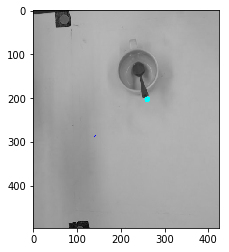

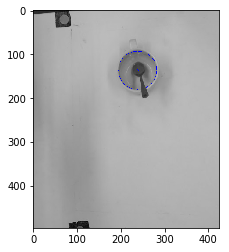

In [242]:

def extract_minBox(contour):
    box = cv2.minAreaRect(contour)
    box = cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    return box

def draw_minBox(image, box):
    img = copy.copy(image)
    cv2.drawContours(img, [box], -1, (0,255,0), 4)
    #plt.figure()
    #plt.imshow(img)
    return img

def farthest_node(node, nodes):
    return nodes[cdist([node], nodes).argmax()], cdist([node], nodes).argmax()


def find_spoon(image, show=True):
    img = copy.copy(image)
    edged, edg_img, cnts, hierarchy=vt.extract_contours(copy.copy(img), 
                                                        min_thresh=25, 
                                                        max_thresh=240, 
                                                        blur = 5, dilate=3, erode=0, 
                                                        cnt_mode = cv2.RETR_TREE)
    CAL_PARAM = {'thresh': [75, 100],
                 'radius': [30,45]}
    minsize=500
    mindistance = 1000
    box_minsize = 1200
    
    circles, cimg = vt.find_circles(copy.copy(img), 0, param=CAL_PARAM, blur=1, show=False)

    show_img = copy.copy(img)
    show_img = cv2.cvtColor(show_img, cv2.COLOR_RGB2GRAY)
    show_img = cv2.cvtColor(show_img, cv2.COLOR_GRAY2RGB)
    
    for cnt in cnts:
        current_outer_contour = []
        for points in cnt:
            current_outer_contour.append(points[0])

        distance = cdist(np.array([[circles[0][0][0],circles[0][0][1]]]),current_outer_contour)

        if cv2.contourArea(cnt) < minsize:
            print("Object at #{} REJECTED because CONTOUR not big enough: ".format(cnt[0]), cv2.contourArea(cnt))
            continue

        if distance[0][0] > mindistance:
            print("Object at #{} REJECTED because not CLOSE ENOUGH: ".format(cnt[0]), distance[0][0])
            continue
        mindistance = distance[0][0]

        box = extract_minBox(cnt)
        box_area = abs((box[0][0]-box[2][0])*(box[1][1]-box[0][1]))
        
        if box_area < box_minsize:
            print("Object at #{} REJECTED because BOX not big enough: ".format(cnt[0]), box_area)
            continue
        fnode = farthest_node([circles[0][0][0],circles[0][0][1]], current_outer_contour)

    print "FNODE: ", fnode
    print "CIRCLE:", circles
    cv2.circle(show_img,(int(member["circle"][0]),int(member["circle"][1])),2,color,1)
    cv2.circle(show_img, (fnode[0][0], fnode[0][1]), 3, (0,255,255),5)
    
    if show:
        plt.imshow(show_img)
        plt.figure()
        plt.imshow(cimg)
        plt.show()
    return circles[0], fnode 





CAL_PARAM = {'thresh': [75, 100],
            'radius': [30,45]}

circles, cimg = vt.find_circles(copy.copy(img), 0, param=CAL_PARAM, blur=1, show=False)

show_img = copy.copy(img)
show_img = cv2.cvtColor(show_img, cv2.COLOR_RGB2GRAY)
show_img = cv2.cvtColor(show_img, cv2.COLOR_GRAY2RGB)
minsize=500
mindistance = 1000
box_minsize = 1200
for cnt in cnts:
    print np.shape(cnt)
    
    current_outer_contour = []
    for points in cnt:
        current_outer_contour.append(points[0])
    
    print np.shape(current_outer_contour)
    distance = cdist(np.array([[circles[0][0][0],circles[0][0][1]]]),current_outer_contour)

    if cv2.contourArea(cnt) < minsize:
        print("Object at #{} REJECTED because not big enough: ".format(cnt[0]), cv2.contourArea(cnt))
        continue
    print "DISTANCE: ", distance[0][0]
    print "MINDISTANCE: ", mindistance
    if distance[0][0] > mindistance:
        print "Too far: ", distance
        continue
    mindistance = distance[0][0]
    
    box = extract_minBox(cnt)
    print "BOX: ", box
    box_area = abs((box[0][0]-box[2][0])*(box[1][1]-box[0][1]))
    if box_area < box_minsize:
        print "BOX TOO SMALL: ", box_area
        continue
    fnode = farthest_node([circles[0][0][0],circles[0][0][1]], current_outer_contour)

print "FNODE: ", fnode
print "CIRCLE:", circles
cv2.circle(show_img,(int(member["circle"][0]),int(member["circle"][1])),2,color,1)
cv2.circle(show_img, (fnode[0][0], fnode[0][1]), 3, (0,255,255),5)

plt.imshow(show_img)
plt.figure()
plt.imshow(cimg)
plt.show()

{'radius': [30, 45], 'thresh': [75, 100]}
37
All Calibration points found
('Object at #[[114 477]] REJECTED because BOX not big enough: ', 972)
('Object at #[[249 173]] REJECTED because CONTOUR not big enough: ', 126.5)
('Object at #[[59  1]] REJECTED because not CLOSE ENOUGH: ', 225.50498885833989)
('Object at #[[70 14]] REJECTED because CONTOUR not big enough: ', 130.0)
('Object at #[[53 10]] REJECTED because CONTOUR not big enough: ', 121.5)
('Object at #[[60  9]] REJECTED because CONTOUR not big enough: ', 2.0)
FNODE:  (array([260, 203], dtype=int32), 48)
CIRCLE: [[[ 238.5         137.5          44.57016754]]]


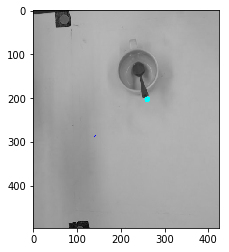

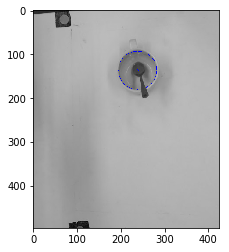

(array([[ 238.5       ,  137.5       ,   44.57016754]], dtype=float32),
 (array([260, 203], dtype=int32), 48))

In [243]:
find_spoon(img)